In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=fb8c3722dafa8f026e95c78cb0fd4724f5ded07c46a4a3325a0c4fa9edf8ac3c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
comida = ctrl.Antecedent(np.arange(0,11,1), 'comida')
servico = ctrl.Antecedent(np.arange(0,11,1), 'serviço')
gorjeta = ctrl.Consequent(np.arange(0,26,1), 'gorjeta')

comida.automf(names=['péssima', 'comível', 'deliciosa'])
servico['ruim'] = fuzz.trimf(servico.universe,[0,0,5])
servico['aceitável'] = fuzz.gaussmf(servico.universe,5,2)
servico['excelente'] = fuzz.gaussmf(servico.universe,10,3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe,[0,0,13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe,[0,13,15,25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe,[15,25,25])

In [ ]:
regra1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'],gorjeta['alta'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
regra3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

In [ ]:
gorjeta_ctrl = ctrl.ControlSystem([regra1,regra2,regra3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

In [ ]:
gorjeta_simulador.input['comida'] = 3.6
gorjeta_simulador.input['serviço'] = 9.2

gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])

18.17834203406994


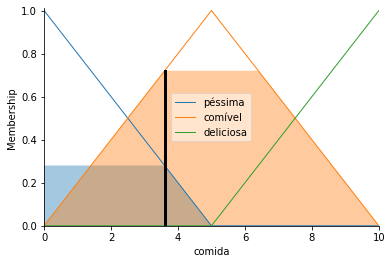

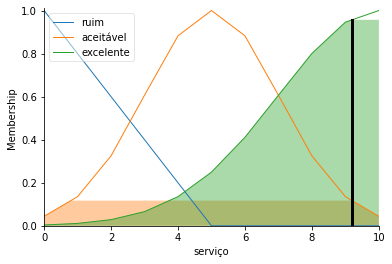

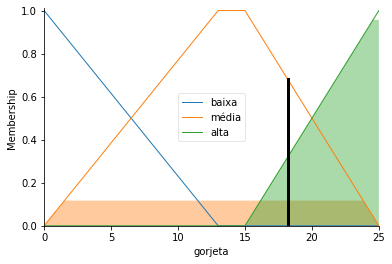

In [ ]:
comida.view(sim = gorjeta_simulador)
servico.view(sim = gorjeta_simulador)
gorjeta.view(sim = gorjeta_simulador)

#comida.view()
#servico.view()
#gorjeta.view()

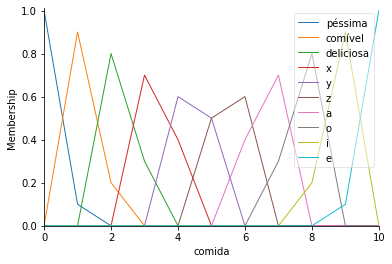

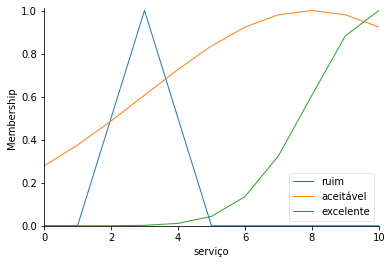

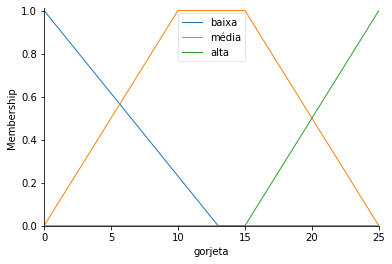

In [ ]:
comida.automf(names=['péssima', 'comível', 'deliciosa','x','y','z','a','o','i','e'])
comida.view()
servico['ruim'] = fuzz.trimf(servico.universe,[1,3,5])
servico['aceitável'] = fuzz.gaussmf(servico.universe,8,5)
servico['excelente'] = fuzz.gaussmf(servico.universe,10,2)
servico.view()
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe,[0,0,13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe,[0,10,15,25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe,[15,25,25])
gorjeta.view()